# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1


For the compilation of the exercises we were given a pseudo-random number generator (that uses the so-called **RANdom New York University procedure (Rannyu)**). In further exercises, the random numbers will be used as if they were distributed uniformally in the interval $[0, 1)$. Here, the assumption of a uniform distribution should be verfied (or, more precisely: we will see that the tests we conduct at least do not contradict this assumption).

For the first test, we recall that the **expectation value** of a uniform distribution is given by:
$$\langle r \rangle = \int_0^1 r dr = 1/2.$$
To estimate the expectation value of the Rannyu generator, we generate $M_{max} = 10^5$ random numbers $r_i$ ($i \in \{1, ..., M\}$), further refered to as number of throws. We divide these into $N=100$ blocks, each containing $L = M_{max} / N = 1000$ random numbers. For each block, we compute the average
$$r^{block}_{k} = \frac{1}{L} \sum_{i=(k-1)L}^{k L} r_i, $$
where $k \in \{1, ..., N\}$. Then, we can also calculate the squared value $(r^{block}_{k})^2$. 
Now, we are able to compute the average over all $N$ blocks of $r^{block}_{k}$ and $(r^{block}_{k})^2$:
$$ \langle (r^{block})^2 \rangle = \frac{1}{N} \sum_{k=1}^N (r^{block}_k)^2 , \quad \langle r^{block} \rangle^2 = \left( \frac{1}{N} \sum_{k=1}^N r^{block}_k \right)^2 .$$
The result for these two values allow us to estimate the uncertainty of $ \langle r^{block} \rangle$:
$$ \frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \langle (r^{block})^2 \rangle - (\langle r^{block} \rangle)^2 \right]}. $$
This method is called **blocking method** and can also be used to estimate the uncertainty on other quantities than $\langle r^{block} \rangle$, e.g. on the variance, see below.

The estimated expectation value as well as its uncertainty depend on the number of blocks. In the figure, we visualize the deviation of $\langle r^{block} \rangle $ from its expected value of $1/2$ as the number of throws $M$ and, thus, the number of blocks $N$ increases (so we are basically considering a progressive mean).
As the number of throws increases, the deviation tends towards $0$. Since the uncertainty decreases and is in agreement with a deviation of $0$, we conclude that the expectation value of the Rannyu generator is - as assumed - $1/2$.

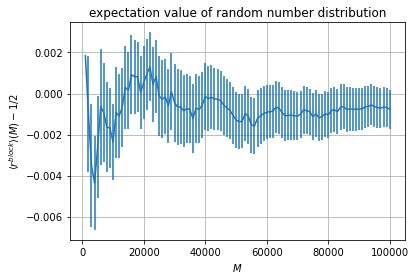

In [29]:
import numpy as np
import matplotlib.pyplot as plt

N, r_mean, r_mean_std = np.loadtxt("data/1_r_vs_M.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(N, r_mean - 1/2, r_mean_std)
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle r^{block} \rangle(M) - 1/2$")
plt.title("expectation value of random number distribution")
plt.grid()

plt.show()

For the second test, we recall that the **variance** $\sigma^2$ of a uniform distribution can be computed to:
$$\sigma^2 = \langle (r - \langle r \rangle)^2 \rangle = \int_0^1 (r-1/2)^2 dr = 1/12,$$
where we used that $\langle r \rangle = 1/2$. Here, we use again the blocking method to compute an estimate of the variance and its uncertainty as a function of the number of throws $M$, see the plot below. Here (and in further exercises), we ommit the superscript "block" if it is already clear that the blocking method is applied.
The plot reveals that the estimated variance of the random number distribution is in good agreement with its expected value of $1/12$. 

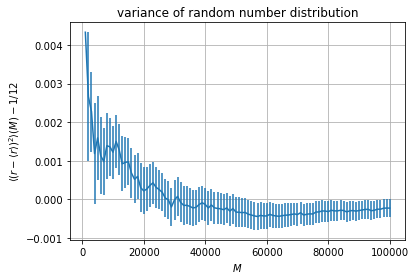

In [10]:
M, r_var, r_var_error = np.loadtxt("data/1_var_vs_M.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, r_var - 1/12, r_var_error)
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle (r - \langle r \rangle)^2 \rangle(M) - 1/12$")
plt.title("variance of random number distribution")
plt.grid()

plt.show()

Finally, we apply **Pearson's cumulative test**. For this purpose, we divide the interval $[0, 1)$ into $N_{intervals} = 100$ subintervals, i.e. into $[0, 0.01)$, $[0.01, 0.02)$, ...
Now, we generate $n = 10^4$ random numbers and calculate 
$$\chi^2 = \sum_{i=1}^{N_{intervals}} \frac{\left( n_i - n/N_{intervals} \right)^2}{n/N_{intervals}},$$
where $n_i$ is the number of throws that fall into the i-th. subinterval. We repeat the calculation of $\chi^2$ $100$ times. 
Below, we visualize the obtained value of $\chi^2$ for each repetition. We can see that $\chi^2$ "oscillates" around its expected value of $\chi^2_{expect} = 100$ (see exercise description for deatailed iinformation on Pearson's cumulative test), which makes us further confident that the random numbers are distributed uniformally.

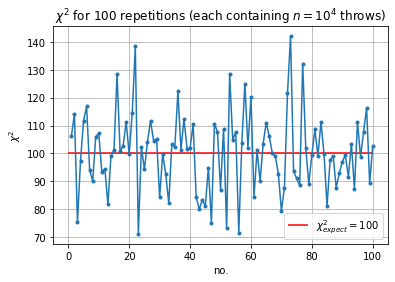

In [21]:
no_repeat, chi2, trash = np.loadtxt("data/1_chi2.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.plot(no_repeat, chi2, marker='.')
plt.hlines(100, 0, 100, color='r', label=r'$\chi^2_{expect} = 100$')
plt.xlabel("no.")
plt.ylabel(r"$\chi^2$")
plt.title(r"$\chi^2$ for $100$ repetitions (each containing $n=10^4$ throws)")
plt.legend()
plt.grid()

plt.show()

### Exercise 01.2

WOFLGANG

### Exercise 01.3